In [8]:
#  Modélisation : comparaison de modèles supervisés  


In [9]:
#  Modélisation : comparaison des modèles sur la consommation

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")



In [10]:
# --- Chargement des données
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").squeeze("columns")
y_test = pd.read_csv("data/y_test.csv").squeeze("columns")



In [11]:
# --- Comparaison de plusieurs modèles
models = {
    "Régression Linéaire": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Forêt Aléatoire": RandomForestRegressor(n_estimators=100, random_state=42)
}

scoring = {"R2": make_scorer(r2_score), "MAE": make_scorer(mean_absolute_error)}
results = {}

#  Nettoyage des NaN avant l'entraînement
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    results[name] = {
        "R2 (moyen)": np.mean(scores["test_R2"]),
        "MAE (moyen)": np.mean(scores["test_MAE"])
    }

results_df = pd.DataFrame(results).T.sort_values(by="R2 (moyen)", ascending=False)
display(results_df)


,R2 (moyen),MAE (moyen)
Ridge Regression,0.998511,172551.750263
Régression Linéaire,0.991809,182331.011914
Forêt Aléatoire,0.963857,473098.747424


 Meilleur modèle : Ridge Regression

 Évaluation finale sur les données de test :
R²  : 0.996
MAE : 220798.757


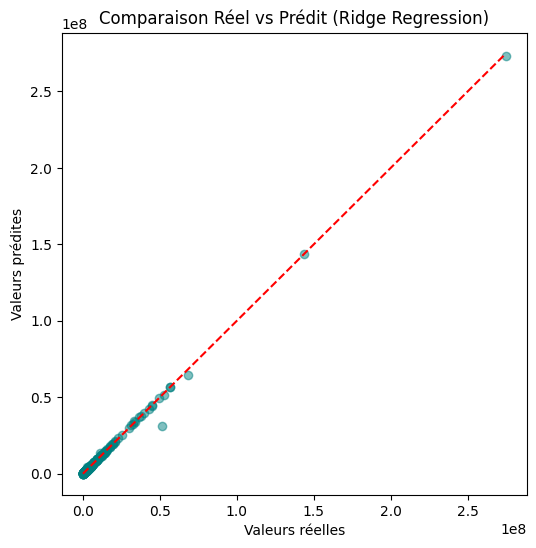

In [12]:
# --- Identifier et tester le meilleur modèle

import matplotlib.pyplot as plt


best_model_name = results_df.index[0]
print(f" Meilleur modèle : {best_model_name}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# --- Évaluation finale sur le jeu de test
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n Évaluation finale sur les données de test :")
print(f"R²  : {r2:.3f}")
print(f"MAE : {mae:.3f}")

# --- Visualisation des prédictions
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title(f"Comparaison Réel vs Prédit ({best_model_name})")
plt.show()
